In [1]:
from sklearn.datasets import fetch_covtype
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
forest = fetch_covtype(as_frame=True)
data= forest['data']
target = forest['target']

In [5]:
forest.DESCR

".. _covtype_dataset:\n\nForest covertypes\n-----------------\n\nThe samples in this dataset correspond to 30×30m patches of forest in the US,\ncollected for the task of predicting each patch's cover type,\ni.e. the dominant species of tree.\nThere are seven covertypes, making this a multiclass classification problem.\nEach sample has 54 features, described on the\n`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.\nSome of the features are boolean indicators,\nwhile others are discrete or continuous measurements.\n\n**Data Set Characteristics:**\n\n    =================   ============\n    Classes                        7\n    Samples total             581012\n    Dimensionality                54\n    Features                     int\n    =================   ============\n\n:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;\nit returns a dictionary-like 'Bunch' object\nwith the feature matrix in the ``data`` member\nand the target values i

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

In [7]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Корреляция признаков и отбор по величине корреляции

In [9]:
corr_with_target = data.corrwith(target).abs().sort_values(ascending=False).reset_index()
corr_with_target.rename(columns={'index': 'feature', 0: 'correlation_with_target'}, inplace=True)
corr_with_target

,feature,correlation_with_target
0,Wilderness_Area_3,0.323200
1,Elevation,0.269554
2,Soil_Type_9,0.243876
3,Wilderness_Area_0,0.203913
4,Soil_Type_37,0.160170
5,Soil_Type_38,0.155668
6,Horizontal_Distance_To_Roadways,0.153450
7,Slope,0.148285
8,Soil_Type_21,0.141746
9,Soil_Type_22,0.135055


In [3]:
model = RandomForestClassifier(max_depth=10)
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.values),columns = data.columns, index=data.index)
comb = data_scaled.join(target)
X = data
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 )

In [28]:
X_train_start = X_train[corr_with_target['feature'][0]].to_frame()
X_test_start = X_test[corr_with_target['feature'][0]].to_frame()
score_list = []
for corr in range(1, len(corr_with_target)+1):
    X_train_part = X_train_start
    X_test_part = X_test_start
    model.fit(X_train_part, y_train)
    score_ = model.score(X_test_part, y_test)
    score_list.append(score_)
    if corr == 54:
        break
    else:
        X_train_start = X_train_start.join(X_train[corr_with_target['feature'][corr]])
        X_test_start = X_test_start.join(X_test[corr_with_target['feature'][corr]])
    print(score_)

0.5193627225995961
0.6713844776941436
0.6724343675417661
0.6796688544152745
0.6815506241968056
0.684843721314485
0.7360531026252983
0.7781290159720947
0.7885131723884707
0.8015536074903616
0.8007848356893703
0.8047606480631541
0.8062637690471819
0.8056498990269874
0.8728428492748301
0.8760384156416376
0.882412337066275
0.8829114650266202
0.879876537543602
0.8873806682577565
0.8858660730677437
0.8855161097852029
0.88346796401689
0.8911040480998715
0.892676014319809
0.8909778318340371
0.8950224894437305
0.894156186891867
0.8904959151826694
0.8952060767394896
0.8983901689003121
0.8940414448320176
0.8907598219203231
0.8901287405911511
0.891838397282908
0.895355241417294
0.8934103635028456
0.8934161006058381
0.8935652652836423
0.8898074628235726
0.8929800807784102
0.8923834220671929
0.8948905360749037
0.8954986689921057
0.8926645401138241
0.8907885074352855
0.8864569946759684
0.8842367358178814
0.8939553882871305
0.8931579309711768
0.8892280154213329
0.8916720212961263
0.8897041949697081


Text(0, 0.5, 'score')

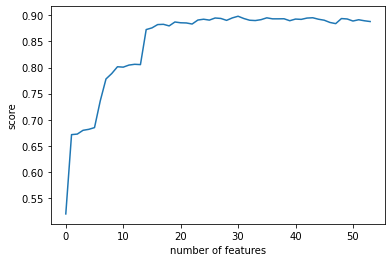

In [30]:
sns.lineplot(x=range(len(corr_with_target)), y=score_list)
plt.xlabel('number of features')
plt.ylabel('score')

## Отбор признаков на основе Information Value

### На сколько я понял Information Value можно посчитать только когда целевая переменная бинарная, что не верно в нашем случае.

## Отбор признаков на основе feature_impotance от алгоритма RandomForest

In [31]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20)

In [33]:
importances = model.feature_importances_
importances

array([2.98593195e-01, 3.54042490e-02, 2.34100368e-02, 4.72975209e-02,
       4.21912165e-02, 9.82176570e-02, 3.00531778e-02, 3.38863885e-02,
       2.95284846e-02, 8.71646451e-02, 1.56037907e-02, 8.16300265e-03,
       1.58852589e-02, 4.39530918e-02, 1.80649879e-03, 1.32192651e-02,
       2.88305627e-03, 1.80616947e-02, 7.62865086e-04, 3.82342563e-03,
       1.43588114e-05, 2.87619598e-05, 1.00785478e-04, 1.92556365e-02,
       3.12259410e-03, 1.51737286e-02, 4.28583850e-03, 3.75207815e-04,
       4.01317540e-06, 7.29488909e-04, 1.89661775e-03, 4.59540161e-04,
       6.81125531e-04, 1.72977918e-03, 7.71877984e-04, 2.03117661e-02,
       1.35413949e-02, 3.60015768e-03, 2.36659808e-04, 2.82075879e-04,
       5.00982557e-04, 1.31476009e-04, 5.99253858e-03, 3.21884996e-03,
       3.17615086e-03, 5.18113584e-03, 3.51902403e-03, 5.46525891e-04,
       1.95747569e-03, 6.74538453e-05, 6.91643835e-04, 1.48786943e-02,
       1.54535500e-02, 8.17456921e-03])

In [48]:
feature_names = data.columns.tolist()
importances = model.feature_importances_
data_importances = pd.DataFrame({"importance":importances,
            "feature":feature_names}).sort_values("importance",
            ascending=False)
data_importances

,importance,feature
0,0.298593,Elevation
5,0.098218,Horizontal_Distance_To_Roadways
9,0.087165,Horizontal_Distance_To_Fire_Points
3,0.047298,Horizontal_Distance_To_Hydrology
13,0.043953,Wilderness_Area_3
4,0.042191,Vertical_Distance_To_Hydrology
1,0.035404,Aspect
7,0.033886,Hillshade_Noon
6,0.030053,Hillshade_9am
8,0.029528,Hillshade_3pm


In [56]:
X_train_start = X_train[data_importances['feature'][0]].to_frame()
X_test_start = X_test[data_importances['feature'][0]].to_frame()
score_list_imp = []
for imp in range(1, len(data_importances['feature'])+1):
    X_train_part = X_train_start
    X_test_part = X_test_start
    model.fit(X_train_part, y_train)
    score_ = model.score(X_test_part, y_test)
    score_list_imp.append(score_)
    if imp == 54:
        break
    else:
        X_train_start = X_train_start.join(X_train[data_importances['feature'][imp]])
        X_test_start = X_test_start.join(X_test[data_importances['feature'][imp]])
    print(score_)

0.671923765375436
0.6885326785386451
0.6938280246006976
0.7224045346062052
0.7254624105011933
0.747670736185056
0.741434505232238
0.7403215072516982
0.7490246924912796
0.7622372406829447
0.773086102441711
0.7713133376170369
0.7704183495502112
0.7684161006058381
0.7624036166697264
0.7699479071048283
0.7668498714888929
0.7619561226363135
0.7608890214797136
0.7604759500642555
0.7598333945290986
0.7547790067927299
0.7552494492381128
0.7494377639067377
0.7561731228199009
0.7489787956673398
0.7471543969157334
0.7441252065357077
0.746081558656141
0.7411189645676519
0.740137919955939
0.7372923168716725
0.7377398109050853
0.7388700201946026
0.7348081512759317
0.7442342114925647
0.7462421975399303
0.7458176519184873
0.7462364604369378
0.7459323939783367
0.74468744262897
0.7448767670277217
0.7433220121167615
0.7433506976317239
0.7449398751606389
0.7443087938314669
0.7446415458050303
0.7455881677987883
0.7482846062052506
0.7475158344042592
0.7444751698182486
0.7430351569671378
0.749064852212227


Text(0, 0.5, 'score')

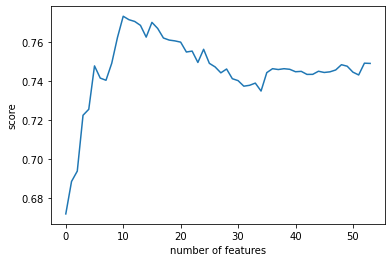

In [58]:
sns.lineplot(x=range(len(data_importances['feature'])), y=score_list_imp)
plt.xlabel('number of features')
plt.ylabel('score')

## Жадный отбор признаков по максимальному нарастанию качества модели

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(model, n_features_to_select=52)
sfs.fit(X_train, y_train)
list_indices_max = sfs.get_support(indices=True)
list_indices_max

Даже потратив несколько часов, не смог получить результат. Но думаю, что логика правильная

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(model, n_features_to_select=52, direction='backward')
sfs.fit(X_train, y_train)
list_indices_max = sfs.get_support(indices=True)
list_indices_max

Даже потратив несколько часов, не смог получить результат. Но думаю, что логика правильная